In [1]:
# Standard library
import sys
import os
import pickle
import time
import datetime
import json
import urllib
import shutil
import string
import logging
import gzip
import re
import csv
import subprocess
import shlex
import tempfile
import itertools
import functools
import glob

import os.path as op
import multiprocessing as mp

from pprint import pprint
#from importlib import reload
from collections import Counter, defaultdict, OrderedDict

from tqdm import tnrange, tqdm_notebook

# Installed packages
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.display import display, HTML, Math



# My packages
#import common
#import pipelines

%matplotlib inline

In [36]:
b1h = pd.read_csv('/home/ccorbi/Work/8-Short-projects/ZincFingers_class/Data/Marcus_f2F3/F3_totalds.csv')
b1h.head(3)

Seq        A1        C1        G1        T1   A2   C2   G2   T2   A3  \
0  WRSWLA  0.551724  0.448276  0.000000  0.000000  1.0  0.0  0.0  0.0  1.0   
1  WRSWRA  0.416667  0.305556  0.000000  0.277778  1.0  0.0  0.0  0.0  1.0   
2  WPSWRA  0.319149  0.276596  0.148936  0.255319  1.0  0.0  0.0  0.0  1.0   

    C3   G3   T3  L  
0  0.0  0.0  0.0  6  
1  0.0  0.0  0.0  6  
2  0.0  0.0  0.0  6

In [37]:
b1h['SPECRES'] = b1h['Seq'].str[0] + b1h['Seq'].str[2] + b1h['Seq'].str[3] + b1h['Seq'].str[5] 


In [38]:
from sklearn.decomposition import PCA

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

In [40]:
fet = ['A1','C1','G1','T1','A2','C2','G2','T2','A3','C3','G3','T3']

In [41]:
b1h.columns

Index(['Seq', 'A1', 'C1', 'G1', 'T1', 'A2', 'C2', 'G2', 'T2', 'A3', 'C3', 'G3',
       'T3', 'L', 'SPECRES'],
      dtype='object')

In [42]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(b1h[fet])

In [43]:
principalComponents.shape

(56174, 2)

In [44]:
principalComponents[:,1].shape

(56174,)

In [45]:
b1h['pc1'] = principalComponents[:,0]
b1h['pc2'] = principalComponents[:,1]

In [46]:
b1h['SPECRES'].value_counts().head(15)

RANR    332
RSNR    329
WSSA    314
RAHR    309
RDSR    293
RSHR    289
WSSS    289
QGNR    265
QRYA    257
RDAR    252
QGSR    249
FGSR    246
WTSA    246
WSSV    245
RFSR    240
Name: SPECRES, dtype: int64

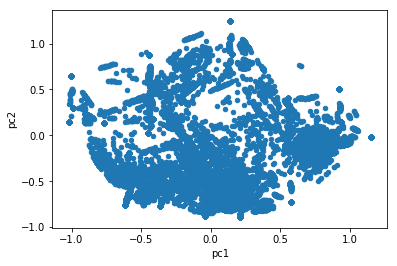

In [24]:
b1h.plot('pc1', 'pc2', kind='scatter')

In [49]:
tops = b1h['SPECRES'].value_counts().head(15).index.tolist()
#b1h['SPECRES'].value_counts().head(15).index

In [50]:
tops

['RANR',
 'RSNR',
 'WSSA',
 'RAHR',
 'RDSR',
 'RSHR',
 'WSSS',
 'QGNR',
 'QRYA',
 'RDAR',
 'QGSR',
 'FGSR',
 'WTSA',
 'WSSV',
 'RFSR']

In [51]:
fdf = b1h[b1h['SPECRES'].isin(tops)]

In [52]:
fdf.SPECRES = pd.Categorical(fdf.SPECRES)
fdf['codes'] = fdf.SPECRES.cat.codes

/home/ccorbi/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/ccorbi/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [53]:
fdf.head(3)

Seq        A1        C1   G1        T1        A2   C2        G2  \
350   WQSSCV  0.555556  0.000000  0.0  0.444444  0.555556  0.0  0.444444   
1279  WQSSLV  0.283019  0.113208  0.0  0.603774  0.264151  0.0  0.566038   
1551  WHSSIV  1.000000  0.000000  0.0  0.000000  1.000000  0.0  0.000000   

            T2        A3        C3   G3        T3  L SPECRES       pc1  \
350   0.000000  0.000000  0.555556  0.0  0.444444  6    WSSV  0.507783   
1279  0.169811  0.320755  0.132075  0.0  0.547170  6    WSSV  0.646411   
1551  0.000000  0.000000  1.000000  0.0  0.000000  6    WSSV -0.008652   

           pc2  codes  
350  -0.414097     13  
1279 -0.156558     13  
1551 -0.729261     13

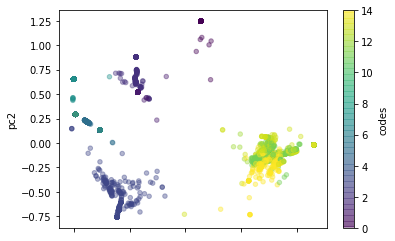

In [55]:
fdf.plot('pc1', 'pc2', kind='scatter', c='codes', colormap='viridis', alpha=.4)

In [56]:
modera = pd.read_csv('/home/kimlab2/ccorbi/MARCUS_ZF/preprocess/RA_totalds_normreads_15_0.07.csv')

In [58]:
def extract_spec_res_marcus(zfinger):
    parts = list()
    #zregion = itersplit_motif(zfinger)
    if len(zfinger) !=0:
        for i in [8,9,10,11,13,14]:
            parts.append(zfinger[i:i+1])
        return ''.join(parts)
    return None

In [59]:
modera['subseq'] = modera['Seq'].apply(extract_spec_res_marcus)

In [60]:
index_pep = modera['subseq'].unique()

In [62]:
b1h[b1h['Seq'].isin(index_pep)].shape

(11982, 17)

In [63]:
moders = pd.read_csv('/home/kimlab2/ccorbi/MARCUS_ZF/preprocess/RS_totalds_normreads_15_0.07.csv')


In [64]:
moders['subseq'] = moders['Seq'].apply(extract_spec_res_marcus)

In [65]:
b1hf2 = pd.read_csv('/home/ccorbi/Work/8-Short-projects/ZincFingers_class/Data/Marcus_f2F3/F2_totalds.csv')
b1hf2['SPECRES'] = b1hf2['Seq'].str[0] + b1hf2['Seq'].str[2] + b1hf2['Seq'].str[3] + b1hf2['Seq'].str[5] 



In [66]:
index_pep_rs = moders['subseq'].unique()

In [67]:
b1hf2[b1hf2['Seq'].isin(index_pep_rs)].shape

(5337, 14)

In [68]:
b1hf2.shape

(57000, 14)